In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as ss

In [2]:
spks_control = h5py.File('./output_control/spikes.h5','r')
spks_64Hz_soma = h5py.File('./output_64Hz_soma_inh/spikes.h5','r')
spks_16Hz_dend = h5py.File('./output_16Hz_dend_inh/spikes.h5','r')

v_control = h5py.File('./output_control/v_report.h5','r')
v_64Hz_soma = h5py.File('./output_64Hz_soma_inh/v_report.h5','r')
v_16Hz_dend = h5py.File('./output_16Hz_dend_inh/v_report.h5','r')

In [3]:
spks_control['spikes']['biophysical']['timestamps'][:].shape[0]/150

5.5

In [4]:
spks_64Hz_soma['spikes']['biophysical']['timestamps'][:].shape[0]/150

5.8533333333333335

In [5]:
spks_16Hz_dend['spikes']['biophysical']['timestamps'][:].shape[0]/150

13.5

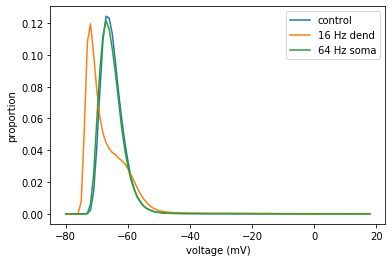

In [6]:
y = np.histogram(v_control['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),y[0]/y[0].sum(),label='control')
y = np.histogram(v_16Hz_dend['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),y[0]/y[0].sum(),label='16 Hz dend')
y = np.histogram(v_64Hz_soma['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),y[0]/y[0].sum(),label='64 Hz soma')
plt.ylabel('proportion')
plt.xlabel('voltage (mV)')
plt.legend()

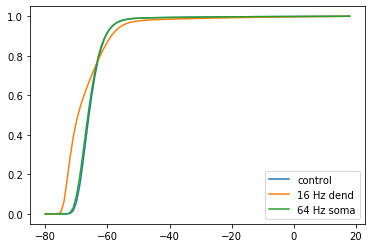

In [7]:
y = np.histogram(v_control['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),np.cumsum(y[0]/y[0].sum()),label='control')
y = np.histogram(v_16Hz_dend['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),np.cumsum(y[0]/y[0].sum()),label='16 Hz dend')
y = np.histogram(v_64Hz_soma['report']['biophysical']['data'][:,0],bins=np.arange(-80,20,1))
plt.plot(np.arange(-80,19,1),np.cumsum(y[0]/y[0].sum()),label='64 Hz soma')
plt.legend()

Text(0, 0.5, 'voltage (mV)')

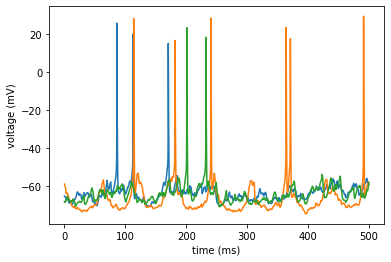

In [8]:
plt.plot(np.arange(0,500,.1),v_control['report']['biophysical']['data'][100000:105000,0])
plt.plot(np.arange(0,500,.1),v_16Hz_dend['report']['biophysical']['data'][100000:105000,0])
plt.plot(np.arange(0,500,.1),v_64Hz_soma['report']['biophysical']['data'][100000:105000,0])
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')

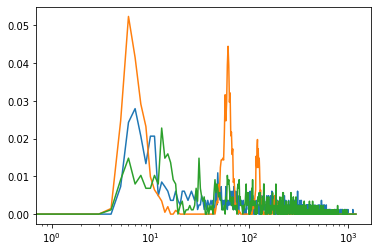

In [9]:
y = np.histogram(np.diff(np.sort(spks_control['spikes']['biophysical']['timestamps'][:])),bins=np.arange(0,1200,1))
plt.semilogx(np.arange(0,1200-1,1),y[0]/y[0].sum())
y = np.histogram(np.diff(np.sort(spks_16Hz_dend['spikes']['biophysical']['timestamps'][:])),bins=np.arange(0,1200,1))
plt.semilogx(np.arange(0,1200-1,1),y[0]/y[0].sum())
y = np.histogram(np.diff(np.sort(spks_64Hz_soma['spikes']['biophysical']['timestamps'][:])),bins=np.arange(0,1200,1))
plt.semilogx(np.arange(0,1200-1,1),y[0]/y[0].sum())
plt.show()

In [10]:
segs = pd.read_csv('L5Segments.csv')
segs_degrees = pd.read_csv('SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
segs['segmentID'] = segs.index
segs = segs.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()

segs['Sec ID'] = segs['Sec ID'].astype(int)
segs['X'] = segs['X'].astype(float)
segs['Elec_distanceQ'] = 'None'

segs.loc[segs.Type=='dend','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='dend','Elec_distance'], 10, labels=False)
segs.loc[segs.Type=='apic','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='apic','Elec_distance'], 10, labels=False)

## Somatic spikes vs. phase of oscillation

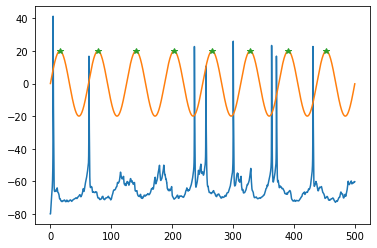

In [75]:
plt.plot(np.arange(0,500,.1),v_16Hz_dend['report']['biophysical']['data'][0:5000,0])
plt.plot(np.arange(0,500,.1), 20*np.sin(2*np.pi*(16/1000)*np.arange(0,500,.1)))
peaks = ss.find_peaks(20*np.sin(2*np.pi*(16/1000)*np.arange(0,500,.1)))[0]
plt.plot(peaks/10,20*np.sin(2*np.pi*(16/1000)*np.arange(0,500,.1))[peaks],'*')

In [123]:
# peaks for entire trace
peaks = ss.find_peaks(20*np.sin(2*np.pi*(16/1000)*np.arange(0,150000,.1)))[0]

h = np.zeros((1,62))
for i in np.arange(0,peaks.shape[0]-1):
    y = np.histogram(spks_16Hz_dend['spikes']['biophysical']['timestamps'][:],
                 bins=np.arange(np.round(peaks[i]/10),np.round(peaks[i+1]/10),1))[0]
    if y.shape[0]<62:
        h+=np.concatenate((y,[0]))
    else:
        h+=y

Text(0.5, 1.0, '16 Hz dendritic inhibition')

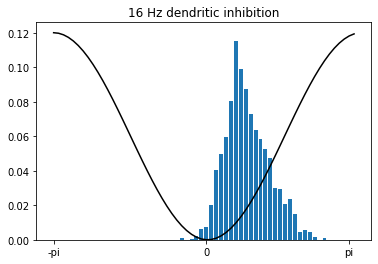

In [125]:
plt.bar(np.arange(0,62),h[0]/h[0].sum())
plt.plot(np.arange(0,62),0.06+0.06*np.cos(2*np.pi*(16/1000)*np.arange(0,62)),color='k')
plt.xticks(ticks=[0,31,60],labels=['-pi','0','pi'])
plt.title('16 Hz dendritic inhibition')

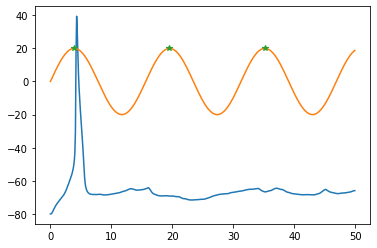

In [102]:
plt.plot(np.arange(0,50,.1),v_64Hz_soma['report']['biophysical']['data'][0:500,0])
plt.plot(np.arange(0,50,.1), 20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1)))
peaks = ss.find_peaks(20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1)))[0]
plt.plot(peaks/10,20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1))[peaks],'*')

In [128]:
# peaks for entire trace
peaks = ss.find_peaks(20*np.sin(2*np.pi*(64/1000)*np.arange(0,150000,.1)))[0]

h = np.zeros((1,15))
for i in np.arange(0,peaks.shape[0]-1):
    y = np.histogram(spks_64Hz_soma['spikes']['biophysical']['timestamps'][:],
                 bins=np.arange(np.round(peaks[i]/10),np.round(peaks[i+1]/10),1))[0]
    if y.shape[0]<15:
        h+=np.concatenate((y,[0]))
    else:
        h+=y

Text(0.5, 1.0, '64 Hz somatic inhibition')

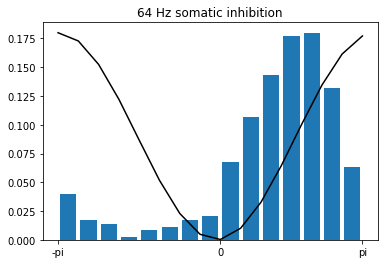

In [133]:
plt.bar(np.arange(0,15)+0.5,h[0]/h[0].sum())
plt.plot(np.arange(0,16),0.09+0.09*np.cos(2*np.pi*(64/1000)*np.arange(0,16)),color='k')
plt.xticks(ticks=[0,8,15],labels=['-pi','0','pi'])
plt.title('64 Hz somatic inhibition')

## Na spikes

In [62]:
na_control = pd.read_csv('na_df.csv')
na_16Hz_dend = pd.read_csv('16Hz_dend_inh_na_df.csv')
na_64Hz_soma = pd.read_csv('64Hz_soma_inh_na_df.csv')

segs_na_df_control = segs.set_index('segmentID').join(na_control.set_index('segmentID')).reset_index()
segs_na_df_16Hzdend = segs.set_index('segmentID').join(na_16Hz_dend.set_index('segmentID')).reset_index()
segs_na_df_64Hzsoma = segs.set_index('segmentID').join(na_64Hz_soma.set_index('segmentID')).reset_index()

na_control_rate = (segs_na_df_control.groupby('segmentID')['na_lower_bound'].count()/150).reset_index()
na_16Hzdend_rate = (segs_na_df_16Hzdend.groupby('segmentID')['na_lower_bound'].count()/150).reset_index()
na_64Hzsoma_rate = (segs_na_df_64Hzsoma.groupby('segmentID')['na_lower_bound'].count()/150).reset_index()

na_control_rate = na_control_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
na_16Hzdend_rate = na_16Hzdend_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
na_64Hzsoma_rate = na_64Hzsoma_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()


Text(0.5, 1.0, '64 Hz soma inh.')

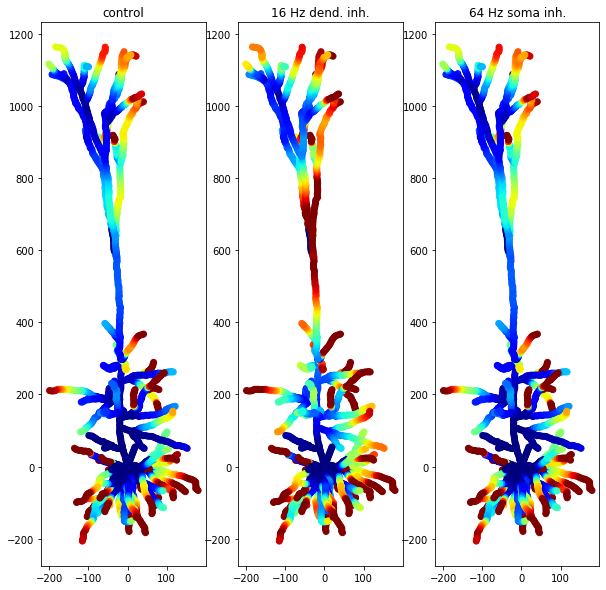

In [69]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.scatter(na_control_rate['Coord X'], 
            na_control_rate['Coord Y'],
            c=na_control_rate['na_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('control')

plt.subplot(1,3,2)
plt.scatter(na_16Hzdend_rate['Coord X'], 
            na_16Hzdend_rate['Coord Y'],
            c=na_16Hzdend_rate['na_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('16 Hz dend. inh.')

plt.subplot(1,3,3)
plt.scatter(na_16Hzdend_rate['Coord X'], 
            na_16Hzdend_rate['Coord Y'],
            c=na_64Hzsoma_rate['na_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('64 Hz soma inh.')

## NMDA spikes

In [71]:
nmda_control = pd.read_csv('nmda_df.csv')
nmda_16Hz_dend = pd.read_csv('16Hz_dend_inh_nmda_df.csv')
nmda_64Hz_soma = pd.read_csv('64Hz_soma_inh_nmda_df.csv')

segs_nmda_df_control = segs.set_index('segmentID').join(nmda_control.set_index('segmentID')).reset_index()
segs_nmda_df_16Hzdend = segs.set_index('segmentID').join(nmda_16Hz_dend.set_index('segmentID')).reset_index()
segs_nmda_df_64Hzsoma = segs.set_index('segmentID').join(nmda_64Hz_soma.set_index('segmentID')).reset_index()

nmda_control_rate = (segs_nmda_df_control.groupby('segmentID')['nmda_lower_bound'].count()/150).reset_index()
nmda_16Hzdend_rate = (segs_nmda_df_16Hzdend.groupby('segmentID')['nmda_lower_bound'].count()/150).reset_index()
nmda_64Hzsoma_rate = (segs_nmda_df_64Hzsoma.groupby('segmentID')['nmda_lower_bound'].count()/150).reset_index()

nmda_control_rate = nmda_control_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
nmda_16Hzdend_rate = nmda_16Hzdend_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
nmda_64Hzsoma_rate = nmda_64Hzsoma_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()


Text(0.5, 1.0, '64 Hz soma inh.')

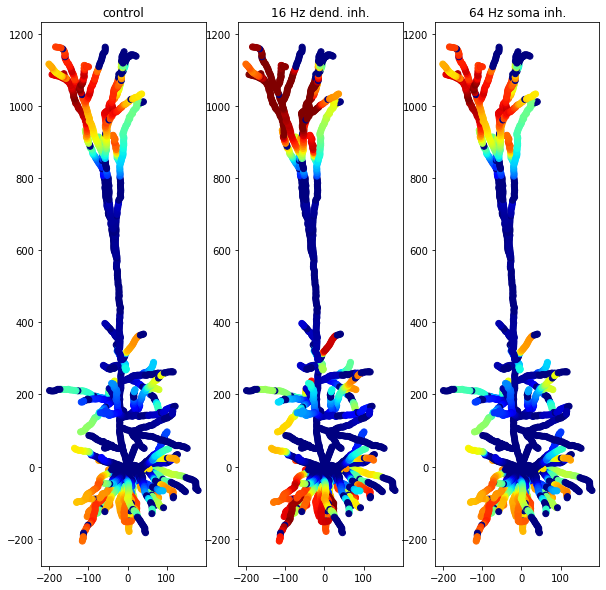

In [73]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.scatter(nmda_control_rate['Coord X'], 
            nmda_control_rate['Coord Y'],
            c=nmda_control_rate['nmda_lower_bound'],
            vmin=0,
            vmax=10,
            cmap='jet')

plt.title('control')

plt.subplot(1,3,2)
plt.scatter(nmda_16Hzdend_rate['Coord X'], 
            nmda_16Hzdend_rate['Coord Y'],
            c=nmda_16Hzdend_rate['nmda_lower_bound'],
            vmin=0,
            vmax=10,
            cmap='jet')

plt.title('16 Hz dend. inh.')

plt.subplot(1,3,3)
plt.scatter(nmda_16Hzdend_rate['Coord X'], 
            nmda_16Hzdend_rate['Coord Y'],
            c=nmda_64Hzsoma_rate['nmda_lower_bound'],
            vmin=0,
            vmax=10,
            cmap='jet')

plt.title('64 Hz soma inh.')

## Ca spikes

In [76]:
ca_control = pd.read_csv('ca_df.csv')
ca_16Hz_dend = pd.read_csv('16Hz_dend_inh_ca_df.csv')
ca_64Hz_soma = pd.read_csv('64Hz_soma_inh_ca_df.csv')

segs_ca_df_control = segs.set_index('segmentID').join(ca_control.set_index('segmentID')).reset_index()
segs_ca_df_16Hzdend = segs.set_index('segmentID').join(ca_16Hz_dend.set_index('segmentID')).reset_index()
segs_ca_df_64Hzsoma = segs.set_index('segmentID').join(ca_64Hz_soma.set_index('segmentID')).reset_index()

ca_control_rate = (segs_ca_df_control.groupby('segmentID')['ca_lower_bound'].count()/150).reset_index()
ca_16Hzdend_rate = (segs_ca_df_16Hzdend.groupby('segmentID')['ca_lower_bound'].count()/150).reset_index()
ca_64Hzsoma_rate = (segs_ca_df_64Hzsoma.groupby('segmentID')['ca_lower_bound'].count()/150).reset_index()

ca_control_rate = ca_control_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
ca_16Hzdend_rate = ca_16Hzdend_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()
ca_64Hzsoma_rate = ca_64Hzsoma_rate.set_index('segmentID').join(segs[['segmentID','Coord X','Coord Y']].set_index('segmentID')).reset_index()


Text(0.5, 1.0, '64 Hz soma inh.')

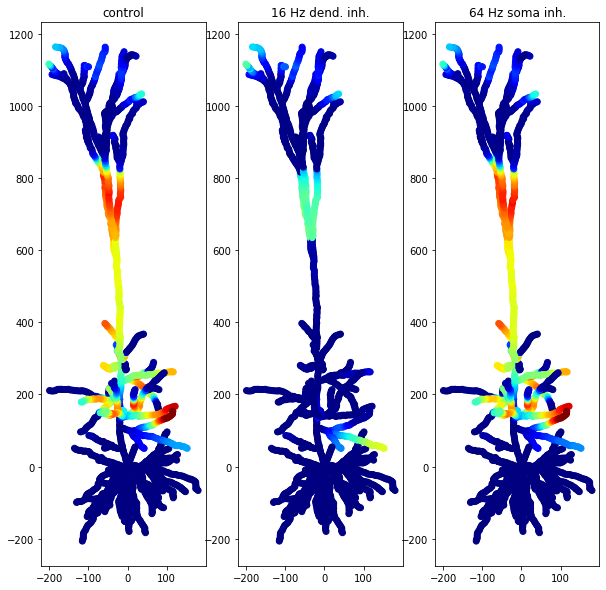

In [79]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.scatter(ca_control_rate['Coord X'], 
            ca_control_rate['Coord Y'],
            c=ca_control_rate['ca_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('control')

plt.subplot(1,3,2)
plt.scatter(ca_16Hzdend_rate['Coord X'], 
            ca_16Hzdend_rate['Coord Y'],
            c=ca_16Hzdend_rate['ca_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('16 Hz dend. inh.')

plt.subplot(1,3,3)
plt.scatter(ca_16Hzdend_rate['Coord X'], 
            ca_16Hzdend_rate['Coord Y'],
            c=ca_64Hzsoma_rate['ca_lower_bound'],
            vmin=0,
            vmax=5,
            cmap='jet')

plt.title('64 Hz soma inh.')

## Do spikes that occur in the trough of oscillation have the same dependence on Na and NMDA spikes as the spikes in the peak?

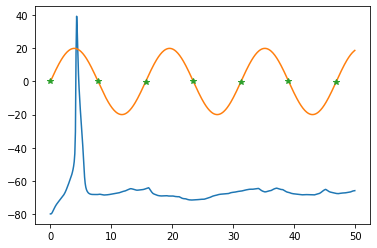

In [135]:
plt.plot(np.arange(0,50,.1),v_64Hz_soma['report']['biophysical']['data'][0:500,0])
plt.plot(np.arange(0,50,.1), 20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1)))
zero_crossings = np.where(np.diff(np.sign(20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1)))))[0]
plt.plot(zero_crossings/10,20*np.sin(2*np.pi*(64/1000)*np.arange(0,50,.1))[zero_crossings],'*')

In [144]:
zero_crossings = np.where(np.diff(np.sign(20*np.sin(2*np.pi*(64/1000)*np.arange(0,150000,.1)))))[0]

In [173]:
spktimes = spks_64Hz_soma['spikes']['biophysical']['timestamps'][:]

peak_spikes = []
trough_spikes = []
for i in np.arange(0,zero_crossings.shape[0]-1):
    inds = np.where((spktimes>zero_crossings[i]/10)&
                    (spktimes<zero_crossings[i+1]/10))[0]
    if inds.shape[0]!=0:
        # For even i, append to peaks
        if np.mod(i,2)==0:
            peak_spikes.append(spktimes[inds][0])
        else:
            trough_spikes.append(spktimes[inds][0])
            
peak_spikes = np.array(peak_spikes)
trough_spikes = np.array(trough_spikes)

## Na spikes

In [174]:
def get_sta(segs_na_df, spktimes):
    na_dend = np.zeros((10,39,))
    na_apic = np.zeros((10,39,))
    
    edges_dend=np.quantile(segs_na_df[(~pd.isnull(segs_na_df.na_lower_bound))&
                                       (segs_na_df.Type=='dend')]['Elec_distance'].unique(),np.arange(0,1.1,0.1))
    
    edges_apic=np.quantile(segs_na_df[(~pd.isnull(segs_na_df.na_lower_bound))&
                                       (segs_na_df.Type=='apic')]['Elec_distance'].unique(),np.arange(0,1.1,0.1))
    
    actual_spktimes = []
    c = 0
    for i in np.sort(spktimes):
        # excludes bursts
        if i-c > 10:
            for e in np.arange(0,10):
                na_inds = segs_na_df[(~pd.isnull(segs_na_df.na_lower_bound))&
                                     (segs_na_df.Type=='dend')&
                                     (segs_na_df.Elec_distance>edges_dend[e])&
                                     (segs_na_df.Elec_distance<=edges_dend[e+1])]['na_lower_bound'].values.astype(int)
    
                x2, _ = np.histogram(na_inds/10,bins=np.arange(np.floor(i)-20,np.floor(i)+20,1))
                na_dend[e] += x2
                
                na_inds = segs_na_df[(~pd.isnull(segs_na_df.na_lower_bound))&
                                     (segs_na_df.Type=='apic')&
                                     (segs_na_df.Elec_distance>edges_apic[e])&
                                     (segs_na_df.Elec_distance<=edges_apic[e+1])]['na_lower_bound'].values.astype(int)
    
                x2, _ = np.histogram(na_inds/10,bins=np.arange(np.floor(i)-20,np.floor(i)+20,1))
                na_apic[e] += x2
            
            actual_spktimes.append(i)
        c = i
    return na_dend, na_apic

In [175]:
na_df = pd.read_csv('64Hz_soma_inh_na_df.csv')
segs_na_df = segs.set_index('segmentID').join(na_df.set_index('segmentID')).reset_index()

In [176]:
na_dend, na_apic = get_sta(segs_na_df, trough_spikes)

In [177]:
rand_spktimes = np.sort(np.random.choice(np.arange(0,150000), trough_spikes.shape[0]))
na_dend_rand, na_apic_rand = get_sta(segs_na_df, rand_spktimes)

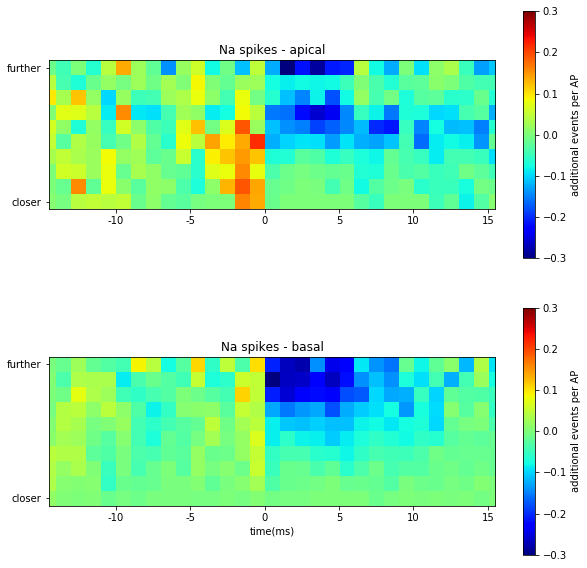

In [179]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Na spikes - apical')
plt.imshow((na_apic-na_apic_rand)/len(trough_spikes),cmap='jet',vmin=-0.3,vmax=0.3)
plt.colorbar(label='additional events per AP')
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlim(5,35)

plt.subplot(2,1,2)
plt.title('Na spikes - basal')
plt.imshow((na_dend-na_dend_rand)/len(trough_spikes),cmap='jet',vmin=-0.3,vmax=0.3)
plt.colorbar(label='additional events per AP')
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlabel('time(ms)')
plt.xlim(5,35)

plt.show()

In [180]:
na_dend, na_apic = get_sta(segs_na_df, peak_spikes)

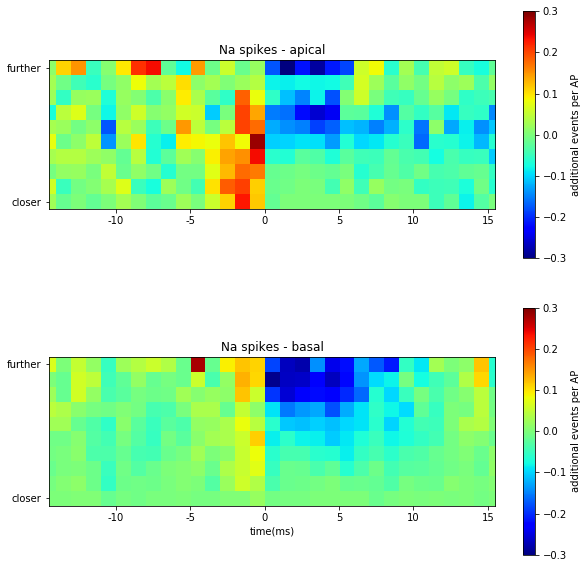

In [181]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Na spikes - apical')
plt.imshow((na_apic-na_apic_rand)/len(peak_spikes),cmap='jet',vmin=-0.3,vmax=0.3)
plt.colorbar(label='additional events per AP',shrink=0.8)
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlim(5,35)

plt.subplot(2,1,2)
plt.title('Na spikes - basal')
plt.imshow((na_dend-na_dend_rand)/len(peak_spikes),cmap='jet',vmin=-0.3,vmax=0.3)
plt.colorbar(label='additional events per AP',shrink=0.8)
plt.xticks(ticks=np.arange(0,40,5)-0.5,labels=['{}'.format(i) for i in np.arange(-20,20,5)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.xlabel('time(ms)')
plt.xlim(5,35)

plt.show()

## NMDA spikes - somatic

In [182]:
def get_nmda_sta(segs_nmda_df, spktimes):    
    nmda_dend = np.zeros((10,27,))
    nmda_apic = np.zeros((10,27,))
    
    edges_dend=np.quantile(segs_nmda_df[(segs_nmda_df.mag<-0.1)&
                                   (segs_nmda_df.Type=='dend')]['Elec_distance'].unique(),np.arange(0,1.1,0.1))
    edges_apic=np.quantile(segs_nmda_df[(segs_nmda_df.mag<-0.1)&
                                   (segs_nmda_df.Type=='apic')]['Elec_distance'].unique(),np.arange(0,1.1,0.1))
    
    actual_spktimes = []
    c = 0
    for i in np.sort(spktimes):
        # excludes bursts
        if i-c > 10:
            for e in np.arange(0,10):
                nmda_inds = segs_nmda_df[(segs_nmda_df.mag<-0.1)&
                                     (segs_nmda_df.Type=='dend')&
                                     (segs_nmda_df.Elec_distance>edges_dend[e])&
                                     (segs_nmda_df.Elec_distance<=edges_dend[e+1])]['nmda_lower_bound'].values.astype(int)
    
                x2, _ = np.histogram(nmda_inds/10,bins=np.arange(np.floor(i)-100,np.floor(i)+40,5))
                nmda_dend[e] += x2
                
                nmda_inds = segs_nmda_df[(segs_nmda_df.mag<-0.1)&
                                     (segs_nmda_df.Type=='apic')&
                                     (segs_nmda_df.Elec_distance>edges_apic[e])&
                                     (segs_nmda_df.Elec_distance<=edges_apic[e+1])]['nmda_lower_bound'].values.astype(int)
    
                x2, _ = np.histogram(nmda_inds/10,bins=np.arange(np.floor(i)-100,np.floor(i)+40,5))
                nmda_apic[e] += x2
            
            actual_spktimes.append(i)
        c = i
        
    return nmda_dend, nmda_apic

In [183]:
nmda_df = pd.read_csv('64Hz_soma_inh_nmda_df.csv')
nmda_df.rename(columns={'seg_id':'segmentID'},inplace=True)
segs_nmda_df = segs.set_index('segmentID').join(nmda_df.set_index('segmentID')).reset_index()

In [193]:
nmda_dend_peak, nmda_apic_peak = get_nmda_sta(segs_nmda_df, peak_spikes)
nmda_dend_rand, nmda_apic_rand = get_nmda_sta(segs_nmda_df, rand_spktimes)

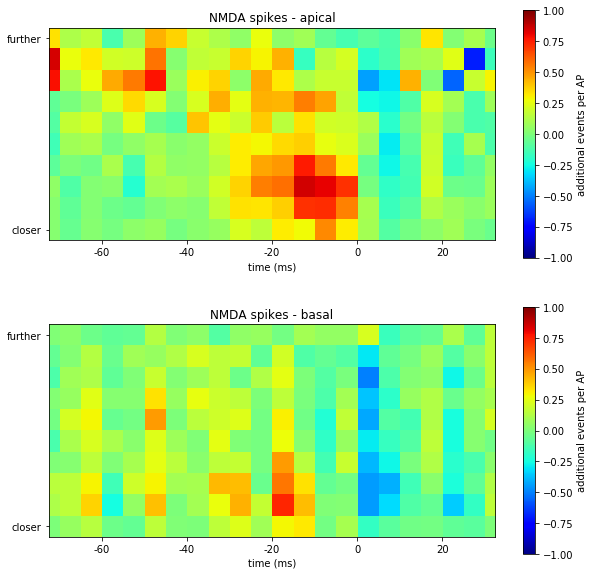

In [200]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('NMDA spikes - apical')
plt.imshow((nmda_apic_peak-nmda_apic_rand)/len(trough_spikes),cmap='jet',vmin=-1,vmax=1)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlabel('time (ms)')
plt.xlim(5,26)

plt.subplot(2,1,2)
plt.title('NMDA spikes - basal')
plt.imshow((nmda_dend_peak-nmda_dend_rand)/len(trough_spikes),cmap='jet', vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlim(5,26)

plt.xlabel('time (ms)')
plt.show()

In [195]:
nmda_dend_trough, nmda_apic_trough = get_nmda_sta(segs_nmda_df, trough_spikes)
nmda_dend_rand, nmda_apic_rand = get_nmda_sta(segs_nmda_df, rand_spktimes)

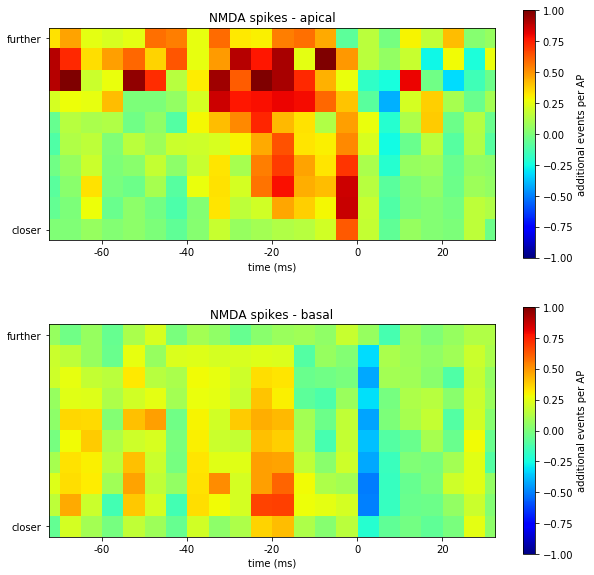

In [199]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('NMDA spikes - apical')
plt.imshow((nmda_apic_trough-nmda_apic_rand)/len(trough_spikes),cmap='jet',vmin=-1,vmax=1)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlabel('time (ms)')
plt.xlim(5,26)

plt.subplot(2,1,2)
plt.title('NMDA spikes - basal')
plt.imshow((nmda_dend_trough-nmda_dend_rand)/len(trough_spikes),cmap='jet', vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlim(5,26)

plt.xlabel('time (ms)')
plt.show()

## NMDA spikes - dendritic

In [202]:
spktimes = spks_16Hz_dend['spikes']['biophysical']['timestamps'][:]

peak_spikes = []
trough_spikes = []
for i in np.arange(0,zero_crossings.shape[0]-1):
    inds = np.where((spktimes>zero_crossings[i]/10)&
                    (spktimes<zero_crossings[i+1]/10))[0]
    if inds.shape[0]!=0:
        # For even i, append to peaks
        if np.mod(i,2)==0:
            peak_spikes.append(spktimes[inds][0])
        else:
            trough_spikes.append(spktimes[inds][0])
            
peak_spikes = np.array(peak_spikes)
trough_spikes = np.array(trough_spikes)

In [203]:
nmda_df = pd.read_csv('16Hz_dend_inh_nmda_df.csv')
nmda_df.rename(columns={'seg_id':'segmentID'},inplace=True)
segs_nmda_df = segs.set_index('segmentID').join(nmda_df.set_index('segmentID')).reset_index()

In [205]:
nmda_dend_peak, nmda_apic_peak = get_nmda_sta(segs_nmda_df, peak_spikes)
nmda_dend_rand, nmda_apic_rand = get_nmda_sta(segs_nmda_df, rand_spktimes)

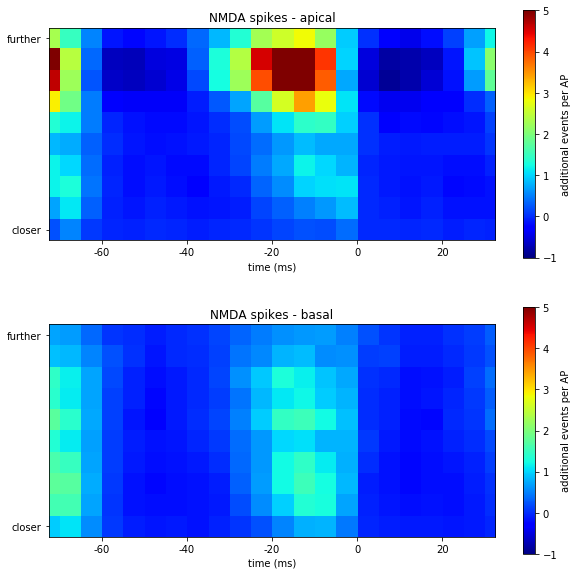

In [210]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('NMDA spikes - apical')
plt.imshow((nmda_apic_peak-nmda_apic_rand)/len(peak_spikes),cmap='jet',vmin=-1,vmax=5)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlabel('time (ms)')
plt.xlim(5,26)

plt.subplot(2,1,2)
plt.title('NMDA spikes - basal')
plt.imshow((nmda_dend_peak-nmda_dend_rand)/len(peak_spikes),cmap='jet', vmin=-1, vmax=5)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlim(5,26)

plt.xlabel('time (ms)')
plt.show()

In [207]:
nmda_dend_trough, nmda_apic_trough = get_nmda_sta(segs_nmda_df, trough_spikes)
nmda_dend_rand, nmda_apic_rand = get_nmda_sta(segs_nmda_df, rand_spktimes)

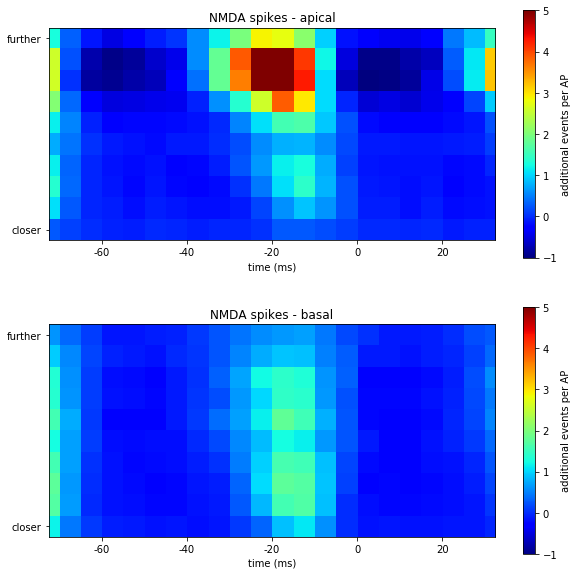

In [209]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('NMDA spikes - apical')
plt.imshow((nmda_apic_trough-nmda_apic_rand)/len(trough_spikes),cmap='jet',vmin=-1,vmax=5)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlabel('time (ms)')
plt.xlim(5,26)

plt.subplot(2,1,2)
plt.title('NMDA spikes - basal')
plt.imshow((nmda_dend_trough-nmda_dend_rand)/len(trough_spikes),cmap='jet', vmin=-1, vmax=5)
plt.xticks(ticks=np.arange(0,26,4)-0.5,labels=['{}'.format(i) for i in np.arange(-100,40,20)])
plt.yticks(ticks=[0,9],labels=['further','closer'])
plt.colorbar(label='additional events per AP')
plt.xlim(5,26)

plt.xlabel('time (ms)')
plt.show()